In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import glob
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
full_rice_images = os.listdir('/content/drive/MyDrive/data/full_rice_grain/')
broken_rice_images = os.listdir('/content/drive/MyDrive/data/broken_rice_grain/')
test_images = os.listdir('/content/drive/MyDrive/data/test/')
full_names=[]
broken_names=[]
test_names=[]
for name in full_rice_images:
  full_names.append(name)
for name in broken_rice_images:
  broken_names.append(name)
for name in test_images:
  test_names.append(name)

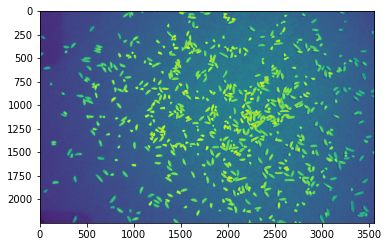

In [ ]:
for name in test_names:
  img = cv2.imread('/content/drive/MyDrive/data/test/' + name,0)
  plt.imshow(img)

Image processing and rice grain counting on images with Full grain

In [ ]:
fullrice_contour_lengths=[]
fullrice_aspect_ratios=[]
i=1
for name in full_names:
  img = cv2.imread('/content/drive/MyDrive/data/full_rice_grain/' + name,0)
  ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)# 160 - threshold
  #averaging filter
  kernel = np.ones((5,5),np.float32)/9
  dst = cv2.filter2D(binary,-1,kernel)

  kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

  #erosion
  erosion = cv2.erode(dst,kernel2,iterations = 1)

  #dilation 
  dilation = cv2.dilate(erosion,kernel2,iterations = 1)

  #edges
  edges = cv2.Canny(dilation,100,200)

  #Size
  contours,hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  print ("No. of rice grains in image",i,": ",len(contours))
  i=i+1
  fullrice_contour_lengths.append(len(contours))
  total_ar=0
  for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    if(aspect_ratio<1):
        aspect_ratio=1/aspect_ratio
    total_ar+=aspect_ratio
  full_avg_1=total_ar/len(contours)

  fullrice_aspect_ratios.append(round(full_avg_1,2))

No. of rice grains in image 1 :  156
No. of rice grains in image 2 :  313
No. of rice grains in image 3 :  439
No. of rice grains in image 4 :  295
No. of rice grains in image 5 :  286
No. of rice grains in image 6 :  211


In [ ]:
np.average(fullrice_aspect_ratios)

1.723333333333333

Image processing and rice grain counting on images with Broken grain

In [ ]:
brokenrice_contour_lengths=[]
brokenrice_aspect_ratios=[]
i=1
for name in broken_names:
  img = cv2.imread('/content/drive/MyDrive/data/broken_rice_grain/' + name,0)
  ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)# 160 - threshold, 255 - value to assign, THRESH_BINARY_INV - Inverse binary
  #averaging filter
  kernel = np.ones((5,5),np.float32)/9
  dst = cv2.filter2D(binary,-1,kernel)# -1 : depth of the destination image

  kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

  #erosion
  erosion = cv2.erode(dst,kernel2,iterations = 1)

  #dilation 
  dilation = cv2.dilate(erosion,kernel2,iterations = 1)

  #edge detection
  edges = cv2.Canny(dilation,100,200)

  ### Size detection
  contours,hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  print ("No. of rice grains in image",i,": ",len(contours))
  i=i+1
  brokenrice_contour_lengths.append(len(contours))
  total_ar=0
  for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    if(aspect_ratio<1):
        aspect_ratio=1/aspect_ratio
    total_ar+=aspect_ratio
  full_avg_1=total_ar/len(contours)

  brokenrice_aspect_ratios.append(round(full_avg_1,2))

No. of rice grains in image 1 :  481
No. of rice grains in image 2 :  379
No. of rice grains in image 3 :  412


In [ ]:
np.average(brokenrice_aspect_ratios)

1.3666666666666665

In [ ]:
def classification(ratio):
    ratio =round(ratio,1)
    classofrice=""
    if(ratio>1.36):
        classofrice="Full"
    elif(ratio<=1.36):
        classofrice="Broken"
    return classofrice

In [ ]:
i=0
submission = pd.read_csv('/content/drive/MyDrive/data/submission.csv')
for name in test_names:
  img = cv2.imread('/content/drive/MyDrive/data/test/' + name,0)
  #convert into binary
  ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)# 160 - threshold, 255 - value to assign, THRESH_BINARY_INV - Inverse binary

  #averaging filter
  kernel = np.ones((5,5),np.float32)/9
  dst = cv2.filter2D(binary,-1,kernel)# -1 : depth of the destination image

  kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

  #erosion
  erosion = cv2.erode(dst,kernel2,iterations = 1)

  #dilation 
  dilation = cv2.dilate(erosion,kernel2,iterations = 1)

  #edge detection
  edges = cv2.Canny(dilation,100,200)

  ### Size detection
  contours,hierarchy = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  print("For image",i,"=")
  print ("No. of rice grains:",len(contours))
  submission['total_rice_grain'].iloc[i] = len(contours)
  total_ar=0
  full=0
  broken=0;
  for cnt in contours:
      x,y,w,h = cv2.boundingRect(cnt)
      aspect_ratio = float(w)/h
      if(aspect_ratio<1):
          aspect_ratio=1/aspect_ratio
      str = classification(aspect_ratio)
      if(str == "Full"):
        full+=1
      if(str == "Broken"):
        broken+=1
      total_ar+=aspect_ratio
  submission['total_broken_rice_grain'].iloc[i] = broken
  i+=1
  print("Full rice grains:",full)
  print("Broken rice grains:",broken)
  print()

For image 0 =
No. of rice grains: 477
Full rice grains: 249
Broken rice grains: 228

For image 1 =
No. of rice grains: 442
Full rice grains: 210
Broken rice grains: 232

For image 2 =
No. of rice grains: 501
Full rice grains: 254
Broken rice grains: 247

For image 3 =
No. of rice grains: 423
Full rice grains: 242
Broken rice grains: 181

For image 4 =
No. of rice grains: 407
Full rice grains: 185
Broken rice grains: 222



In [ ]:
submission.head()

,file_name,total_rice_grain,total_broken_rice_grain
0,image_1.jpg,477.0,228.0
1,image_2.jpg,442.0,232.0
2,image_3.jpg,501.0,247.0
3,image_4.jpg,423.0,181.0
4,image_5.jpg,407.0,222.0


In [ ]:
submission.to_csv('/content/drive/MyDrive/data/submission.csv')